Nearest Neighbor =  [[24  8]]


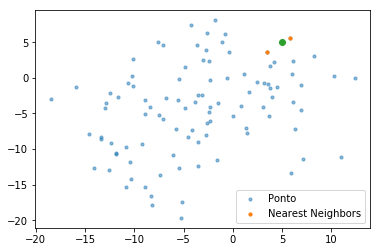

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs
#-------------------------------------
nn = NearestNeighbors(n_neighbors=2, algorithm='ball_tree')
X, _ = make_blobs(n_features=2, n_samples=100, cluster_std=5)
#-------------------
nn.fit(X)
nn.kneighbors([[5,5]])
_, X_nearest = nn.kneighbors([[5,5]])
nearest = X[X_nearest[0]]
print('Nearest Neighbor = ',X_nearest)
#--------------------------
f = plt.figure()
plt.scatter(X[:,0], X[:,1], s=10, alpha=.5, label='Ponto')
plt.scatter(nearest[:,0], nearest[:,1], s=10, cmap='virdis', label='Nearest Neighbors')
plt.scatter([5],[5])
plt.legend()
plt.show()

KNC predict:  [1]
KNC Neighbors:  [[32 48 15  1 16]]
RNC: [0]
distancias:  [array([32, 48])]


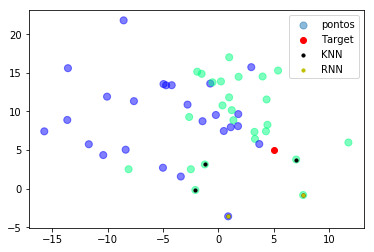

In [75]:
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
#------------------------------------
knc = KNeighborsClassifier(n_neighbors=5)
rnc = RadiusNeighborsClassifier(radius=5, weights='distance')
#--------------------------------
X, Y = make_blobs(n_features=2, n_samples=50, cluster_std=5, centers=2)
#--------------------
knc.fit(X,Y)
rnc.fit(X,Y)
#--------------------------
knc_pred = knc.predict([[5,-5]])
print('KNC predict: ', knc_pred)
_, knc_neighbors = knc.kneighbors([[5,-5]])
print('KNC Neighbors: ', knc_neighbors)
#--------------------------------
rnc_pred = rnc.predict([[5,-5]])
print('RNC:', rnc_pred)
_, rnc_neighbors = rnc.radius_neighbors([[5,-5]])
print('distancias: ', rnc_neighbors)
#----------------------------------
nearest = X[knc_neighbors[0]]
nearest_r = X[rnc_neighbors[0]]
#-----------------------------------|
f = plt.figure()
plt.scatter(X[:,0], X[:,1], s=50, alpha=.5, c=Y, cmap='winter', label='pontos')
plt.scatter([5],[5], c='r',label='Target')
plt.scatter(nearest[:,0], nearest[:,1], s=10, c='k', label = 'KNN')
plt.scatter(nearest_r[:,0], nearest_r[:,1], s=10, c='y', label = 'RNN')
plt.legend()
plt.show()

Shape:  (400, 64, 64)
Data Shape:  (400, 4096)


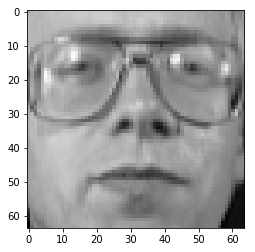

In [79]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
targets = faces.target
plt.imshow(faces.images[11], cmap='gray')
print('Shape: ', faces.images.shape)
print('Data Shape: ', faces.data.shape)

(300, 4096)
(100, 4096)


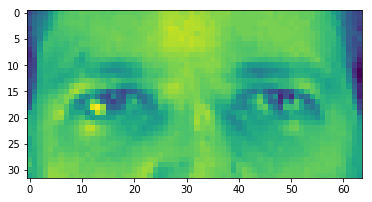

In [97]:
train = faces.data[targets < 30]
test = faces.data[targets >= 30]
plt.imshow(train[0][:2048].reshape(32,64))
#---------------------------------------
train_x = train[:,:2048]
train_y = train[:,2048:]
test_x = test[:,:2048]
test_y = test[:,2048:]
#------------------------
print(train.shape)
print(test.shape)

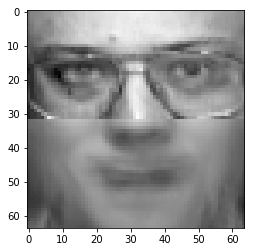

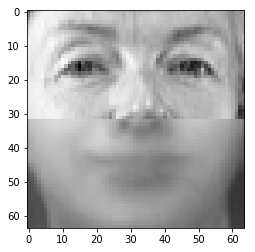

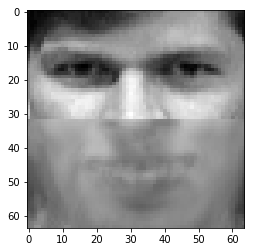

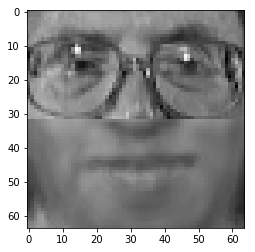

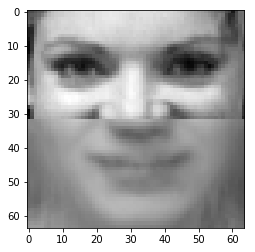

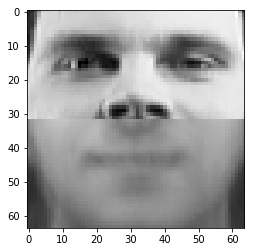

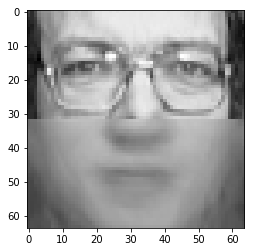

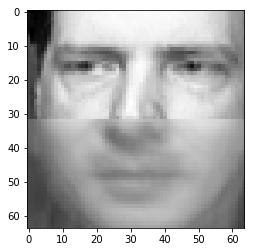

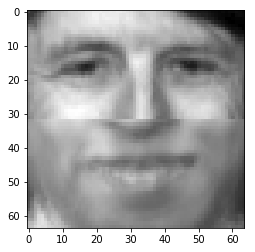

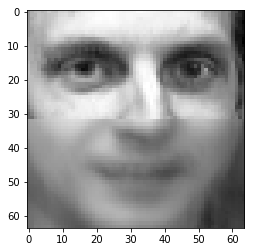

In [99]:
from sklearn.neighbors import KNeighborsRegressor

nn_r = KNeighborsRegressor(n_neighbors=20, weights='distance', n_jobs=-1)
nn_r.fit(train_x, train_y)
#----------------------
sample = test_x[::10]
res = nn_r.predict(sample)
final = np.hstack([sample,res])
#------------------------------

for img in final:
    plt.imshow(img.reshape(64,64), cmap='gray')
    plt.show()

In [101]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.datasets import load_iris
iris = load_iris()
nc = NearestCentroid()
nc.fit(iris.data, iris.target)
nc.score(iris.data, iris.target)

0.9266666666666666